<a href="https://colab.research.google.com/github/joaquinAmiel/BairesDev/blob/master/Data_science_assignment_Multiplica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science Assignment

## Introducción al problema
La misión principal de la prueba es analizar los datos de la base de datos e identificar el cluster de usuarios a los cuales targetear en una campaña de marketing.

El entregable de la prueba consistirá en un reporte con la siguiente estructura:
- Planteamiento inicial de cómo abordar la misión
- Qué modelo analítico has decidido usar para la tarea y explicación breve del mismo
- Por qué has utilizado dicho modelo
- Conclusiones finales y recomendaciones

## Índice
- Resumen Ejecutivo.
- Analisis exploratorio y depuración de la base.
- Modelado de datos.
- Descripción de clusters. 
- Asignación de clusters a la base inicial.

## Resumen Ejecutivo

En la base proporcionada, no existe ninguna etiqueta que permita hacer un modelo basado en datos históricos (a partir de otras campaña, o una similar o igual), es decir que no hay conocimiento a priori. Adicionalmente, todas las variables son numéricas, por lo tanto, para modelar los datos se implementó un algoritmo de aprendizaje no supervisado basado en clusterización, donde el objetivo es encontrar diferentes grupos dentro de los individuos, de manera que los individuos que pertenecen al mismo clúster (o grupo) sean más similares entre sí que con los de clústeres diferentes. 

Para el modelado de datos, se utilizará el algoritmo k-means ya que es el más utilizado dentro de los algoritmos no supervisados y ademas porque las variables consideradas son todas numéricas, lo cual hace este algoritmo se ajuste perfectamente a nuestra necesidad. El algoritmo tiene la siguiente lógica:

1. Seleccionar el parámetro *k* que refiere al número de grupos a utilizar (utilizando el método del codo) e iniciar aleatoriamente el proceso seleccionando al azar k puntos dentro del espacio, estos seran los centros de cada grupo.
2. Clasificar cada punto calculando la distancia entre ese punto y el centro de cada grupo, y luego clasificandolo para que esté en el grupo cuyo centro está más cercano a él. 
3. Sobre la base de estos puntos clasificados, recalcular el centro del grupo tomando la media de todos los vectores del grupo.
4. Repetir estos pasos hasta que el algoritmo cumpla un criterio de parada que puede ser, cumplir un número determinado de iteraciones o hasta que los centros del grupo no cambien mucho entre cada iteración.

A partir del algoritmo de aprendizaje no supervisado se logro identificar los siguientes segmentos de usuarios:
- **Los pesimistas**: Estos usuarios son bastante más nuevos que promedio, en lo que refiere a antiguedad, son los que en promedio menos amigos tienen y ademas son los que menos reviews dan. Sin embargo se caracterizan por hacerlo negativamente. Ellos representan casi el 20% de la base. No se recomienda su inclusión en campañas ya si el contacto no es exitoso, hay probabilidades de que suponga un costo colateral muy alto derivado de un mal review.

- **Los optimistas**: Estos usuarios en promedio son los mas nuevos. Si bien tampoco dan una alta cantidad de reviews (el doble que el primer grupo), a la inversa de los pesimistas, se caracterizan por hacerlo positivamente. Representan el 43% del total y a priori pareceria ser un segmento interesante de individuos a realizar una campaña porque probablemente reaccionen positivamente.

- **Los amigables**: Este segmento es muy chico, ya que solamente incluye el 1.3% de las personas, pero es un segmento muy particular, estos se destacan por su gran cantidad de amigos, lo cual hace que sus comentarios sean muy valiosos, porque probablemente lleguen a más personas y por ende se puede potenciar la marca o ir en su defecto, arruinarla. Por lo cual si se los incluye en una campaña, debería asegurarse la calidad de la misma.

- **Los reviewers**: Estos individuos se caracterizan por tener una alta cantidad de reviews por mes y por una alta cantidad de votos, representan el 3% de la base. Si bien son pocos, ellos probablemente darán un review del producto, por lo cual si se los incluye en un campaña, deberia asegurarse la calidad de la misma para mejorar la imagen de marca (mediante su review), no obstante, no es tan prioritario como el grupo de **"Los amigables"**.

- **Los desinteresados**: Estos individuos hace tiempo estan activos, pero sin embargo, su actividad es baja, aunque mayor que la de los individuos más nuevos(segmentos pesimistas y optimistas). Su puntaje promedio es similar al promedio. A estos individuos se le podria realizar una campaña, pero tal vez no de alta inversión.

Finalmente, a partir del análisis se logró identificar distintos segmentos de usuarios describiendolos y realizando recomendaciones acerca de su tratamiento, adicionalmente a partir del análisis exploratorio se concluye que: 
- un 5% vota siempre 1 estrella (puede haber tenido una sola votación), por otro lado, un 20% vota 5 estrellas. Los usuarios tienden a votar positivamente (encima de 3 estrellas).
- Casi un 70% usuarios de esta plataforma tienen 1 amigo o ninguno.
- Los usuarios con más reviews son también los que más votan.
- A medida que aumenta la cantidad de meses de actividad, aumenta el promedio de actividad de los usuarios.

Si te interesó el Resumen ejecutivo, a continuación se muestra el análisis completo, además ante cualquier duda puedes escribir a joaquinamiel@gmail.com

## Analisis exploratorio de los datos y depuración de la base
En esta fase el objetivo es analizar la base brindada con el fin de lograr un mejor entendimiento del problema, evaluar como abordarlo, determinar si hay que hacer alguna depuración en los datos y extraer algunos insights.

In [ ]:
#import libraries 
import warnings
warnings.filterwarnings("ignore")

!pip install kneed
from kneed import KneeLocator

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from google.colab import drive
# mount google drive information in a google colaboratory directory
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#leer Bases de Datos
path = r'gdrive/My Drive/Thinko/' # path
#path = 'Data/' # path
df = pd.read_csv(path+'Yelp.csv') #,sep=';'

In [ ]:
#Se eliminar de la base ID duplicados, ya que no son confiables
df.drop_duplicates(inplace=True,subset='ID')


Como podemos observar en el encabezado de los datos, no hay ninguna etiqueta que nos permita hacer un modelo basado en datos históricos. Es decir, una forma de implementar una estrategia de campañas de marketing es con datos históricos de usuarios a los cuales se les haya hecho otra campaña, o una similar o igual en distinto modelo. Por ejemplo, si fuera una campaña realizada con el objetivo de ofrecer un préstamo al consumo, se podria tener datos históricos de usuarios que ya hayan participado en campañas de prestamos, con estos se podria hacer un modelo para evaluar si los nuevos clientes a los que se les va a ofrecer tienen una alta o baja probabilidad de aceptar un préstamo y así mejorar la rentabilidad de la campaña.

Adicionalmente, todas las variables son numéricas, dado esto y lo enunciado anteriormente (que no hay un conocimiento a priori), lo que si se puede hacer es implementar un algoritmo de aprendizaje no supervisado de clusterización. En términos básicos, el objetivo de la agrupación es encontrar diferentes grupos dentro de los individuos. Para ello, los algoritmos de agrupamiento encuentran la estructura en los datos de manera que los individuos que pertenecen del mismo clúster (o grupo) sean más similares entre sí que con los de clústeres diferentes. Esto nos permite describirlos de manera conjunta (una descripción por cluster).


In [ ]:
df.set_index('ID',inplace=True)
df.head()

,Months Active,Reviews,Average Review,Votes,Friends
ID,,,,,
HzLh-2WyMjf6TYATFwg6NA,36,5,3.60,2,0
gYV6bmTSgbZMGkvXHVCowg,38,5,2.20,86,0
4duCDxDMiRJJbc2CmnziAg,46,7,3.57,2,0
2EeuYhLuzvvrJ9v2pVrTjQ,30,4,3.00,1,0
5AwX3A1D-PJkkrWuRpmpCA,49,19,4.30,36,2


In [ ]:
#como vemos las columnas tienen nombres no amigables para el análisis
df.columns

Index([' Months Active', ' Reviews', ' Average Review', ' Votes', ' Friends '], dtype='object')

In [ ]:
df.rename(columns={' Months Active':'months_active',
                   ' Reviews':'reviews',
                   ' Average Review':'average_review',
                   ' Votes':'votes',
                   ' Friends ':'friends'}, inplace=True)

A partir de la siguiente tabla descriptiva se pueden extraer las conclusiones que se detallan en los siguientes enunciados

- No hay datos nulos, si asi fuera los conteos de elementos no nulos (count) en las distintas variables sería distinto.
- Si bien las variables Meses Activo y Review promedio parecen tener una "relativa simetria", las variables son extremadamente asimétricas, donde se evidencia la presencia de datos atípicos, lo cual necesitan tratamiento, ya que al estar utilizando algoritmos que se basan en distancias, estos pueden alterar de forma drástica los resultados. 
- Se pueden crear las variables "Reviews por mes" y "Votos por mes" de esta manera se independizaran las variables Reviews y Votes del tiempo en el cual un individuo pertenezca activo.

In [ ]:
descriptive_table = df.describe(include='all').round(decimals=3)
description_numeric=descriptive_table.loc[['count','mean','std','min','25%','50%','75%','max']]   
description_numeric.dropna(axis=1, thresh=None, inplace=True)
description_numeric

,months_active,reviews,average_review,votes,friends
count,9888.000,9888.000,9888.000,9888.000,9888.000
mean,40.569,33.779,3.744,152.833,4.277
std,20.379,112.485,1.028,1471.384,22.838
min,7.000,1.000,1.000,0.000,0.000
25%,25.000,2.000,3.290,2.000,0.000
50%,39.000,6.000,3.900,7.000,0.000
75%,53.000,18.000,4.500,30.000,2.000
max,118.000,3166.000,5.000,67094.000,1066.000


In [ ]:
df['review_per_month'] = round(df.reviews/df.months_active,3)
df['votes_per_month'] = round(df.votes/df.months_active,3)

### Detección de outliers
Se utilizará el algoritmo de isolation forrest para la detección de outliers de manera multidimensional. Se trabajará bajo el supuesto que el 1% de los datos son outliers. Una cantidad mayor supone un problema, ya que no serían outliers, si no que serian parte del total de la data.
Esto no es un problema, ya que el objetivo del análisis es enviar datos a campañas de marketing, seria distinto si el objetivo fuera detectar por ejemplo, fraude.

In [ ]:
n_estimators = 5000
anomalies_ratio=0.01
random_state = 42

clf = IsolationForest(n_estimators = n_estimators, contamination = anomalies_ratio, random_state = random_state)
clf.fit(df[['average_review', 'friends','review_per_month', 'votes_per_month']])
df['outlier']=clf.predict(df[['average_review', 'friends','review_per_month', 'votes_per_month']])

In [ ]:
pd.value_counts(df.outlier)

 1    9789
-1      99
Name: outlier, dtype: int64

In [ ]:
df=df[df.outlier==1]
df.drop(columns=['outlier'],inplace=True)

Sin los outliers detectados en el algoritmo de isolation forrest los datos se regularizan bastante, no obstante para aplicar los modelos de aprendizaje no supervisado hace falta estandarizar las variables:
- la variable reviews pasa de un desvio estandar de 112 a 72.
- la variable votes pasa de un desvio estandar de 1471 a 268.
- la variable votes pasa de un desvio estandar de 22 a 9.

In [ ]:
df.describe()

,months_active,reviews,average_review,votes,friends,review_per_month,votes_per_month
count,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000
mean,40.287363,26.939728,3.743980,66.913883,2.954234,0.545038,1.172412
std,20.182744,72.053297,1.032713,268.540590,9.177625,1.187845,3.886438
min,7.000000,1.000000,1.000000,0.000000,0.000000,0.011000,0.000000
25%,24.000000,2.000000,3.290000,2.000000,0.000000,0.077000,0.056000
50%,38.000000,5.000000,3.900000,7.000000,0.000000,0.167000,0.209000
75%,53.000000,17.000000,4.500000,28.000000,2.000000,0.430000,0.673000
max,118.000000,1352.000000,5.000000,7892.000000,187.000000,15.745000,85.783000


En el histograma de review promedio nos muestra que aproximadamente un 5% vota siempre 1 estrella (puede haber tenido una sola votación), por otro lado, aproximadamente un 20% vota 5 estrellas. Finalmente, los usuarios tienden a votar positivamente (ver la gráfica a la derecha de 3).

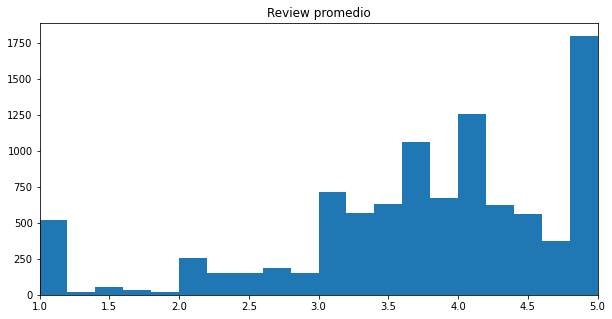

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n, bins, patches = ax.hist(df.average_review, bins=20,density=False) 
ax.set_xlim(1,5)
ax.set_title('Review promedio');

Casi un 70% usuarios de esta plataforma tienen 1 amigo o ninguno.

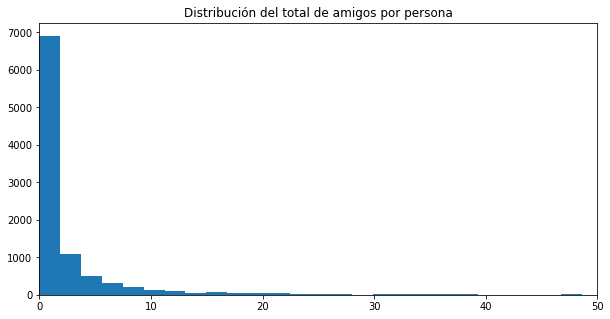

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n, bins, patches = ax.hist(df.friends, bins=100,density=False)
ax.set_xlim(0,50)
ax.set_title('Distribución del total de amigos por persona');

Como vemos en el gráfico tanto la cantidad de reviews, como la cantidad de votos caen de forma exponencial.

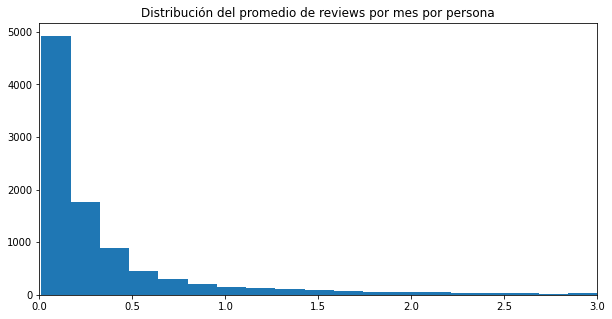

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n, bins, patches = ax.hist(df.review_per_month, bins=100,density=False)
ax.set_xlim(0,3)
ax.set_title('Distribución del promedio de reviews por mes por persona');

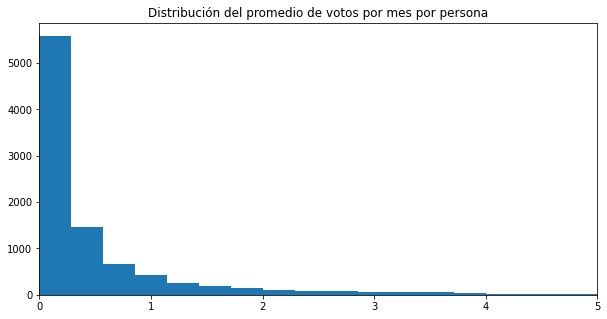

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n, bins, patches = ax.hist(df.votes_per_month, bins=300,density=False)
ax.set_xlim(0,5)
ax.set_title('Distribución del promedio de votos por mes por persona');

### Análisis de correlación

Como vemos en el siguiente gráfico, existe una correlación casi perfecta entre votos por mes y votos y entre review por mes y reviews, por esta razón se opta por eliminar las variables votes y reviews ya que como se comentó anteriormente estan influenciadas por el tiempo de vida del usuario.

Adicionalmente, hay una correlación alta entre reviews por mes y votos por mes, lo cual nos indica que los usuarios que hacen mas reviews por mes también son los que más votan.

Finalmente hay una baja correlación positiva entre la cantidad de tiempo activo y la cantidad de reviews promedio mensual. Lo cual podemos concluir que a medida que aumenta el tiempo los usuarios se vuelven mas activos (análoga conclusión se puede extraer del número de votos)


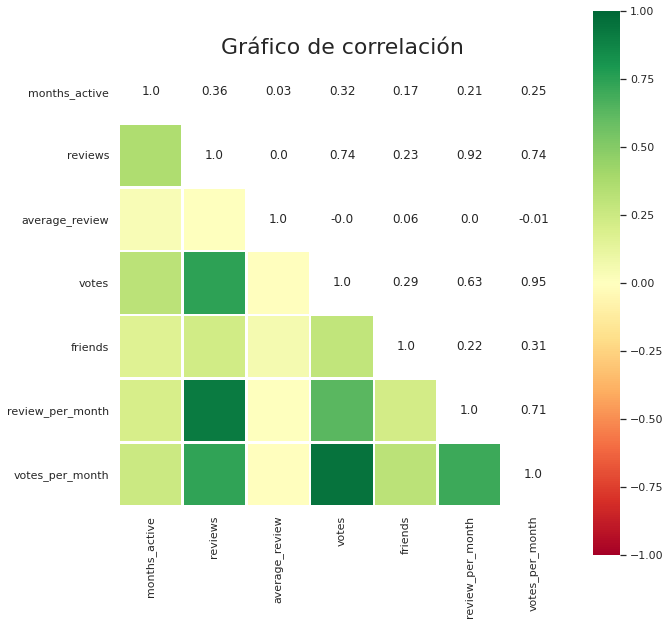

In [ ]:
sns.set(style="white")
fig, ax = plt.subplots(1, figsize=(10, 10))
corr = df.corr()
labels = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
labels = labels.round(2)
labels = labels.replace(np.nan, ' ', regex=True)

mask = np.triu(np.ones(corr.shape)).astype(np.bool)
ax = sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    cmap='RdYlGn',
    fmt='',
    square=True,
    linewidths=1.5).set_title("Gráfico de correlación", fontsize=22)
mask = np.ones(corr.shape) - mask
ax = sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=ListedColormap(['white']),
    annot=labels,
    cbar=False,
    fmt='',
    linewidths=1.5)

In [ ]:
df.drop(columns=['votes','reviews'],inplace=True)

## Modelado de datos
En análisis no supervisados no se debe dividir la muestra en test y train (ya que no hay etiquetas), pero si es necesario alguna forma de estandarización, en este caso se utilizará una estandarización normal (restar media y dividir sobre el desvio).

In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(df)

Para el modelado de datos, se utilizará el algoritmo k-means ya que es el más utilizado dentro de los algoritmos no supervisados y ademas porque las variables consideradas son todas numéricas, lo cual hace este algoritmo se ajuste perfectamente a nuestra necesidad. También se podriá utilizar otros como por ejemplo el DBSCAN que también sirve para este tipo de escenarios, aunque si se quiera explicar, no es tan sencillo.

Lo primero que hay que determinar es el número de grupos a utilizar, para eso se utiliza la medida de inercia que mide la suma de los errores al cuadrado, los errores son los derivados de considerar un cluster y no un elemento particular. Si bien es un elemento que mide la calidad de la segmentación, al aumentar el número de clusters la inercia tiende a descender.

El "método del codo" es un gráfico que mide el descenso de la inercia con respecto al número de cluster, por lo cual el valor final a utilizar es un compromiso entre el error y el total de clusters. Observando el gráfico el número de clusters a utilizar es 5.


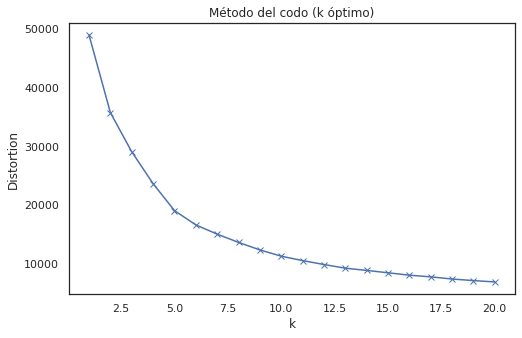

In [ ]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=70)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método del codo (k óptimo)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5,random_state=20,n_init=10,max_iter=300)
kmeans.fit(X)        

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

18975.8422932686

In [ ]:
df['kmeans']=kmeans.labels_.tolist()

## Descripción de clusters

La siguiente tabla nos muestra los promedios de cada una de las variables por cada etiqueta, de esta manera podemos describir cada uno de los segmentos:

- **Los pesimistas (Segmento 0)**: Estos usuarios son bastante más nuevos que promedio, en lo que refiere a antiguedad, son los que en promedio menos amigos tienen y ademas son los que menos reviews dan. Sin embargo se caracterizan por hacerlo negativamente. Ellos representan casi el 20% de la base. No se recomienda su inclusión en campañas ya si el contacto no es exitoso, hay probabilidades de que suponga un costo colateral muy alto derivado de un mal review.

- **Los optimistas (Segmento 1)**: Estos usuarios en promedio son los mas nuevos. Si bien tampoco dan una alta cantidad de reviews (el doble que el primer grupo), a la inversa de los pesimistas, se caracterizan por hacerlo positivamente. Representan el 43% del total y a priori pareceria ser un segmento interesante de individuos a realizar una campaña porque probablemente reaccionen positivamente.

- **Los amigables (Segmento 2)**: Este segmento es muy chico, ya que solamente incluye el 1.3% de las personas, pero es un segmento muy particular, estos se destacan por su gran cantidad de amigos, lo cual hace que sus comentarios sean muy valiosos, porque probablemente lleguen a más personas y por ende se puede potenciar la marca o ir en su defecto, arruinarla. Por lo cual si se los incluye en una campaña, debería asegurarse la calidad de la misma.

- **Los reviewers (Segmento 3)**: Estos individuos se caracterizan por tener una alta cantidad de reviews por mes y por una alta cantidad de votos, representan el 3% de la base. Si bien son pocos, ellos probablemente darán un review del producto, por lo cual si se los incluye en un campaña, deberia asegurarse la calidad de la misma para mejorar la imagen de marca (mediante su review), no obstante, no es tan prioritario como el grupo de **"Los amigables"**.

- **Los desinteresados (Segmento 4)**: Estos individuos hace tiempo estan activos, pero sin embargo, su actividad es baja, aunque mayor que la de los individuos más nuevos(segmentos pesimistas y optimistas). Su puntaje promedio es similar al promedio. A estos individuos se le podria realizar una campaña, pero tal vez no de alta inversión.

In [ ]:
tabla=df.groupby(["kmeans"]).mean()
tabla['Porcentaje']=100*pd.value_counts(df.kmeans).sort_index()/df.shape[0]
tabla['Total']=pd.value_counts(df.kmeans).sort_index()
round(tabla,2)

,months_active,average_review,friends,review_per_month,votes_per_month,Porcentaje,Total
kmeans,,,,,,,
0,29.66,2.14,0.67,0.18,0.27,19.76,1934
1,28.08,4.39,1.44,0.30,0.34,43.66,4274
2,51.89,3.99,62.68,1.19,4.56,1.34,131
3,60.13,3.72,11.77,5.79,17.22,3.06,300
4,61.01,3.84,3.08,0.58,1.19,32.18,3150


In [ ]:
df.mean()

months_active       40.287363
average_review       3.743980
friends              2.954234
review_per_month     0.545038
votes_per_month      1.172412
kmeans               1.842476
dtype: float64

## Asignación de clusters a la base
En esta sección se asignan los clusters a los individuos de la base, quedando de la siguiente manera:


In [ ]:
asignacion={0:'Los pesimistas', 1:'Los optimistas', 2:'Los amigables', 3:'Los reviewers', 4:'Los desinteresados'}
df['Cluster']= df.kmeans.map(asignacion)
df.drop(columns=['kmeans'],inplace=True)
df.head()

,months_active,average_review,friends,review_per_month,votes_per_month,Cluster
ID,,,,,,
HzLh-2WyMjf6TYATFwg6NA,36,3.60,0,0.139,0.056,Los optimistas
gYV6bmTSgbZMGkvXHVCowg,38,2.20,0,0.132,2.263,Los pesimistas
4duCDxDMiRJJbc2CmnziAg,46,3.57,0,0.152,0.043,Los desinteresados
2EeuYhLuzvvrJ9v2pVrTjQ,30,3.00,0,0.133,0.033,Los pesimistas
5AwX3A1D-PJkkrWuRpmpCA,49,4.30,2,0.388,0.735,Los desinteresados
